In [322]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import sklearn
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline  

In [176]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [177]:
df.set_index('Id', inplace =True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

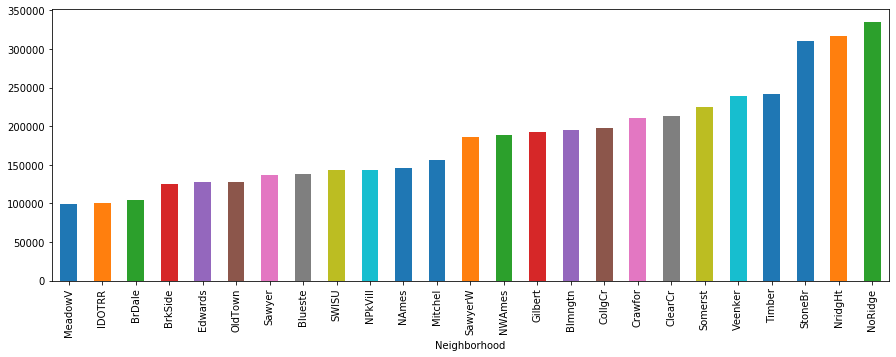

In [155]:
series = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
ax = series.plot.bar(figsize=(15,5))
series

In [178]:
dic ={}

new_dic = {}
for index in range(len(series)):
    for i in dic.keys():
        
        if series[index] > i and series[index] < i+50000:
           
            new_dic[series.index[index]] = dic[i]
            continue
df.replace({"Neighborhood": new_dic}, inplace=True)


In [167]:
df['Neighborhood'].value_counts()

1    676
2    427
3    214
5    143
Name: Neighborhood, dtype: int64

In [170]:
y = df['SalePrice']
X= df.drop(columns = ['SalePrice'])
X_columns=X.columns

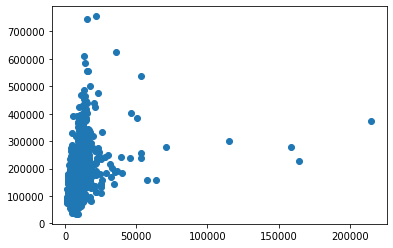

In [209]:
plt.scatter(X[['LotArea']], y)

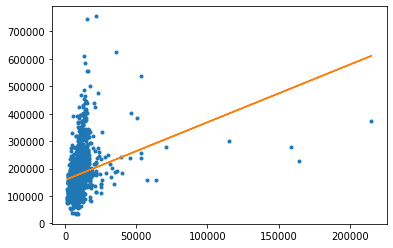

In [214]:
b, m = polyfit(X['LotArea'], y, 1)

plt.plot(X['LotArea'], y, '.')
plt.plot(X['LotArea'], b + m * X['LotArea'], '-')
plt.show()

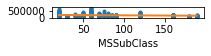

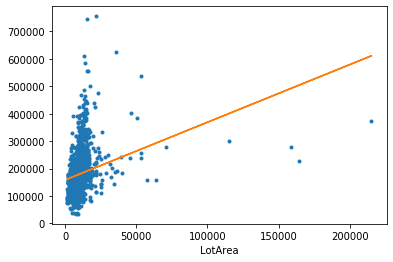

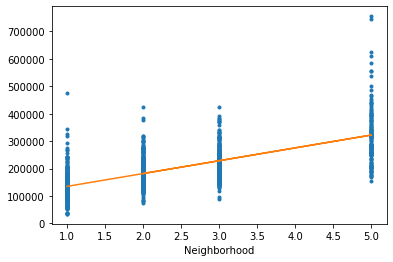

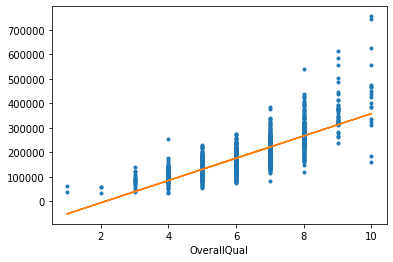

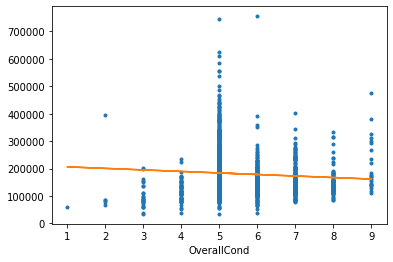

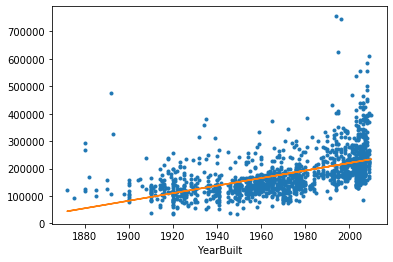

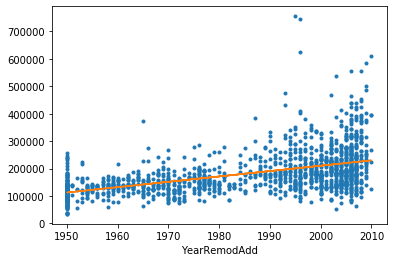

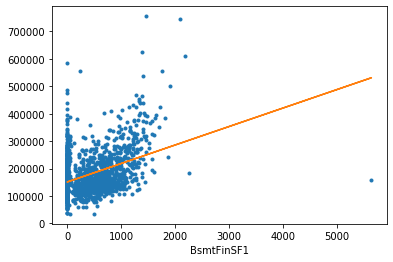

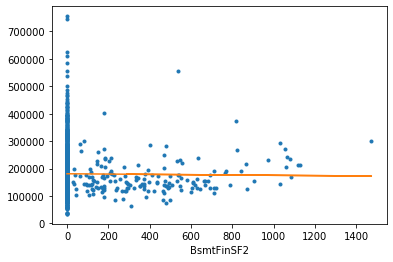

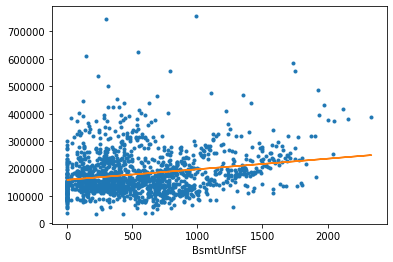

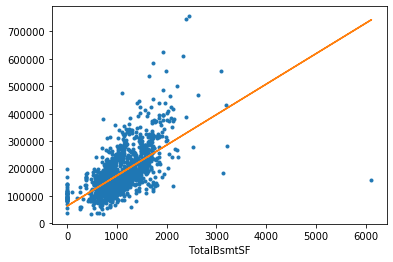

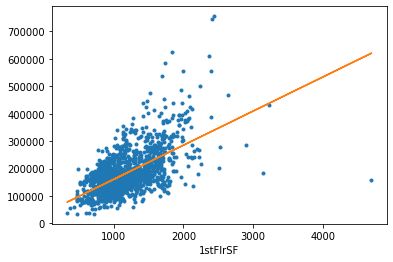

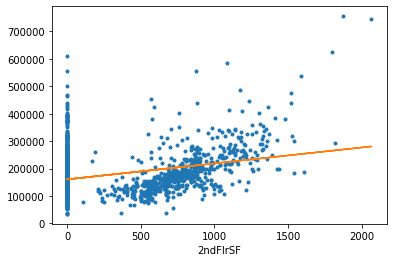

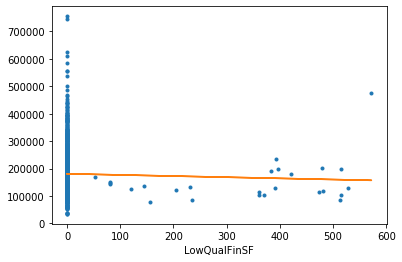

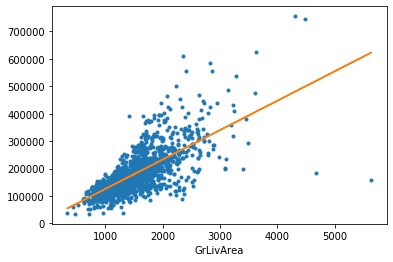

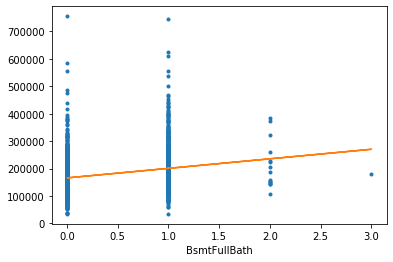

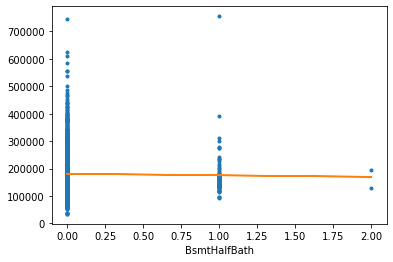

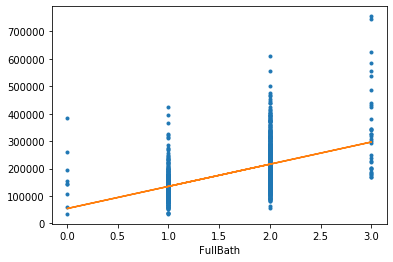

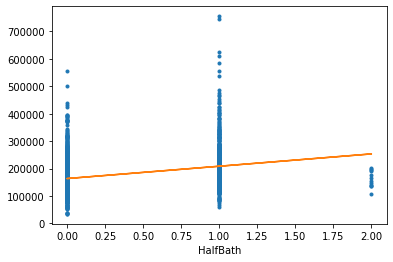

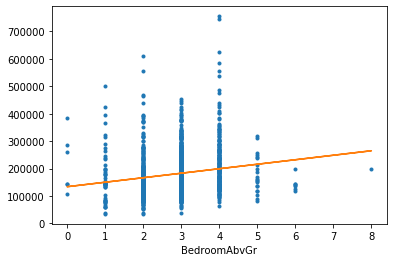

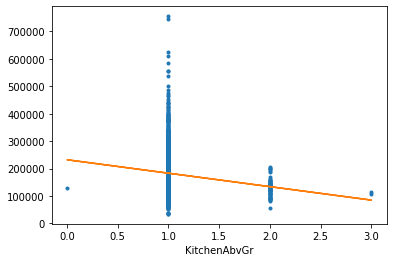

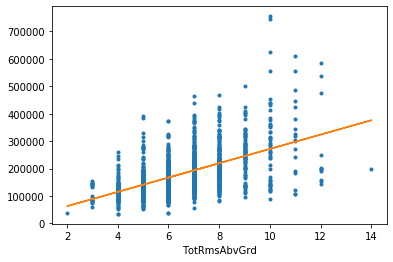

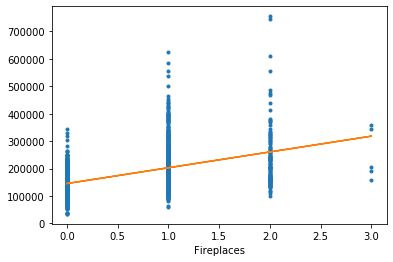

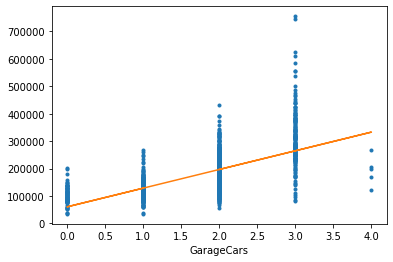

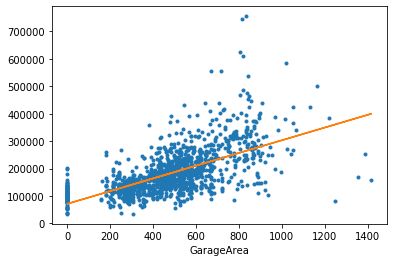

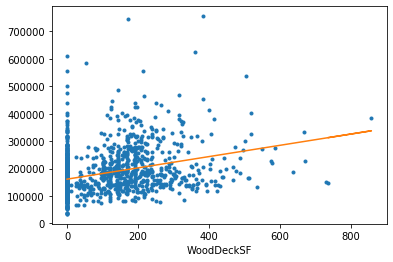

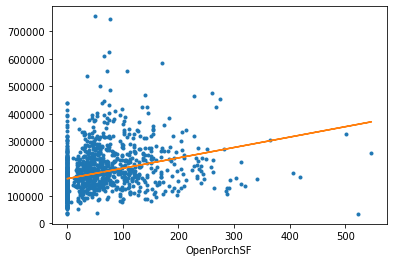

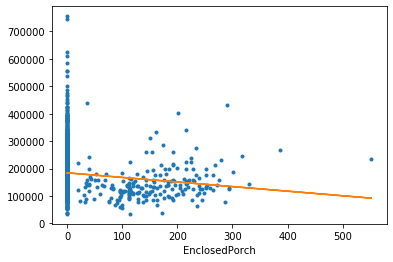

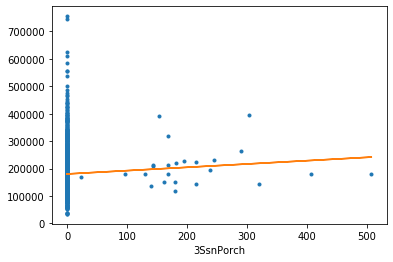

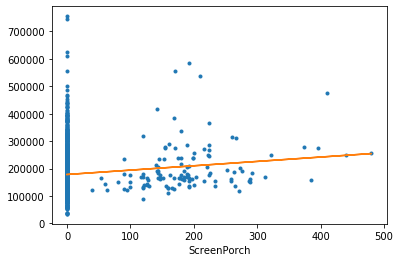

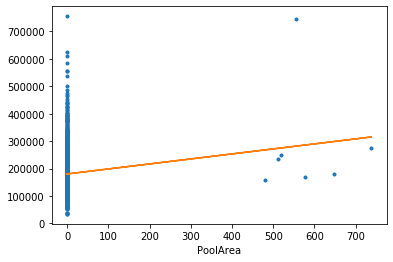

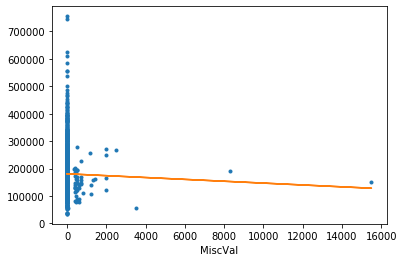

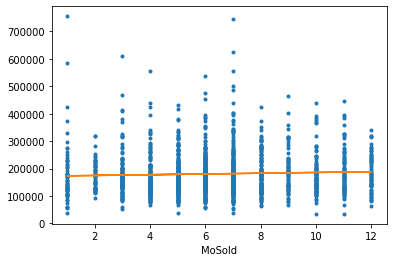

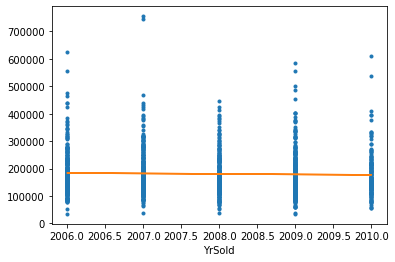

In [257]:
plt.subplot(17,2,1)


for col in X_columns:
    if X[col].dtype == 'int64':
        b, m = polyfit(X[col], y, 1)
        plt.plot(X[col], y, '.')
        plt.plot(X[col], b + m * X[col], '-')
        plt.xlabel(col)
        plt.show()
X_int_columns = [x for x in X_columns if X[x].dtype == 'int64']

In [337]:
#out =sklearn.feature_selection.f_regression(X[X_int_columns], y)
for i in range(1,50):    
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X[X_int_columns], y)
    chose_col = selector.get_support()
    best_10_features = [X_int_columns[i] for i in range(len(X_int_columns)) if chose_col[i] == True]
    lm2 = LinearRegression()
    lm2.fit(X[best_10_features], y)
    
    # print the coefficients
    #print(lm2.intercept_)
    #print(lm2.coef_)
    new_y =lm2.predict(X[best_10_features])
    print(new_y)
    print(i)
    print(np.mean((new_y - y)**2))
    

[221844.53863694 176408.73604384 221844.53863694 ... 221844.53863694
 130972.93345074 130972.93345074]
1
2360934371.5670257
[210433.5088862  200970.11065873 210433.5088862  ... 233166.15599653
 123308.77110027 123308.77110027]
2
1925686102.82837
[210948.09060559 186831.17040802 214922.72922815 ... 264727.68275678
 114025.09998059 123334.12201765]
3
1439414662.2856793
[211101.63795247 189414.00487145 214822.08252685 ... 245558.15179323
 109125.90525535 117839.5780743 ]
4
1363279864.395281
[211571.87285679 187034.04785062 217401.13091597 ... 243250.80814869
 107924.12892189 117776.77524557]
5
1350192540.2609305
[202364.11832403 193655.22482782 208418.74112264 ... 241886.5637833
 116190.76844947 129497.86867966]
6
1260463626.772954
[199792.624775   193939.88867129 205849.97671774 ... 240160.39605303
 115999.10187338 129620.21472981]
7
1253750419.535687
[198942.81988878 192400.8472078  205018.79135809 ... 240191.26975568
 116571.2986902  130380.74248152]
8
1252061920.0884414
[199416.822956

ValueError: k should be >=0, <= n_features = 34; got 35. Use k='all' to return all features.

711783.0505980698
[-1.78275722e+02  2.84033296e-01  1.62887427e+04  1.34832667e+04
  5.32779842e+03  2.02620306e+02  7.94329607e+01  9.75404708e+00
 -1.06393340e+00 -6.60582106e-01  8.02953157e+00  1.76152895e+01
  1.45087582e+01 -2.64588139e+00  2.94781664e+01  8.68479630e+03
  4.63279412e+03  2.64419005e+03  2.71546232e+02 -7.19491976e+03
 -1.12788537e+04  4.67941595e+03  2.65514510e+03  9.23031366e+03
 -1.50568325e+00  2.19510687e+01  4.81253353e+00 -7.56610452e-01
  2.60523968e+01  5.91594981e+01 -1.47306174e+01  1.93510335e-02
 -3.21895020e+02 -6.63501658e+02]


1021517947.8885748

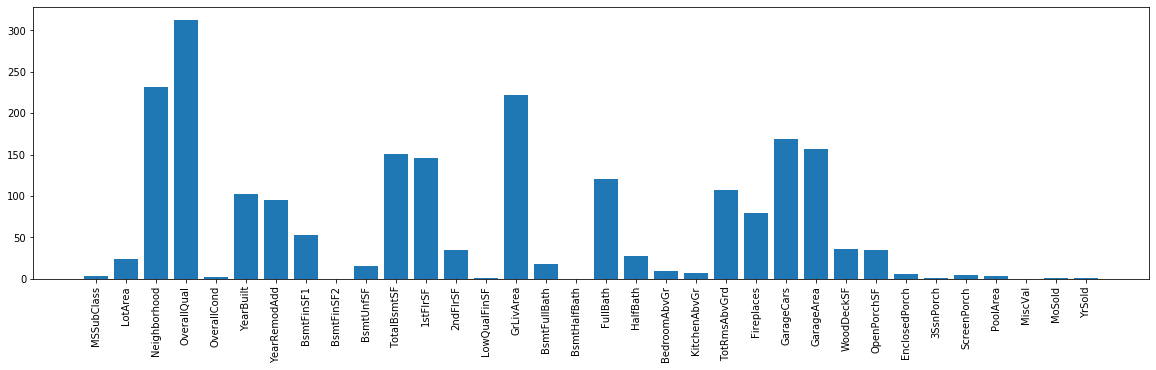

In [258]:
scores = -np.log10(selector.pvalues_)
plt.figure(figsize=(20,5))
plt.bar(range(len(X_int_columns)), scores, width=0.8)
plt.xticks(range(len(X_int_columns)), X_int_columns, rotation='vertical')

plt.show()

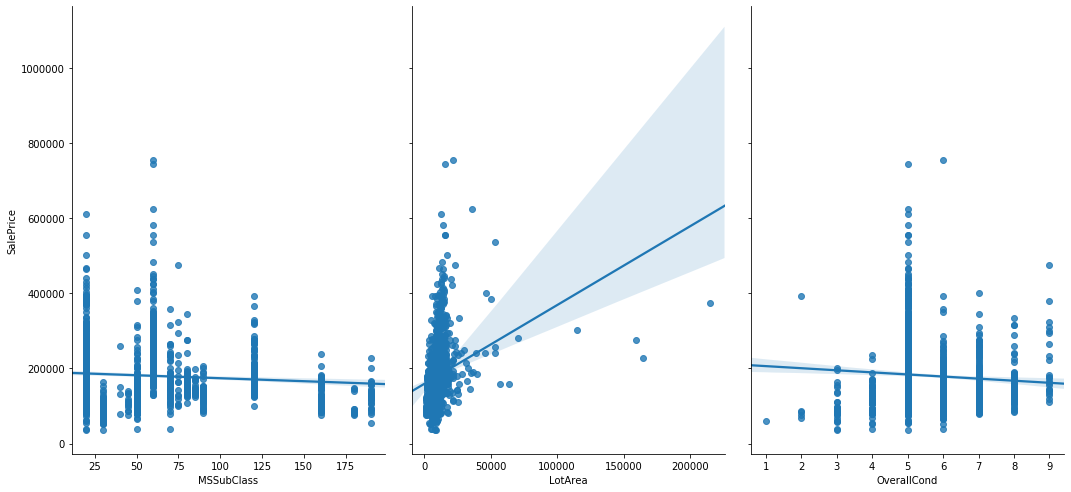

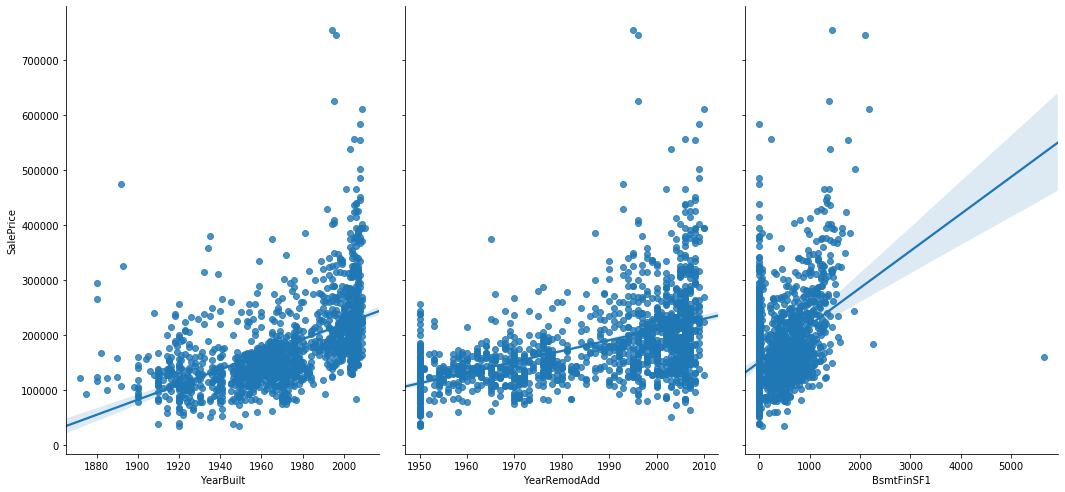

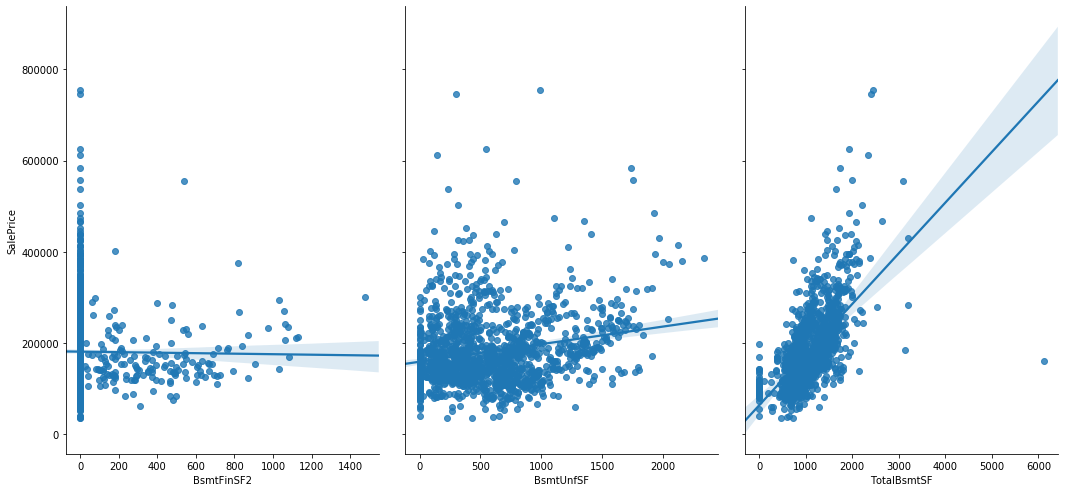

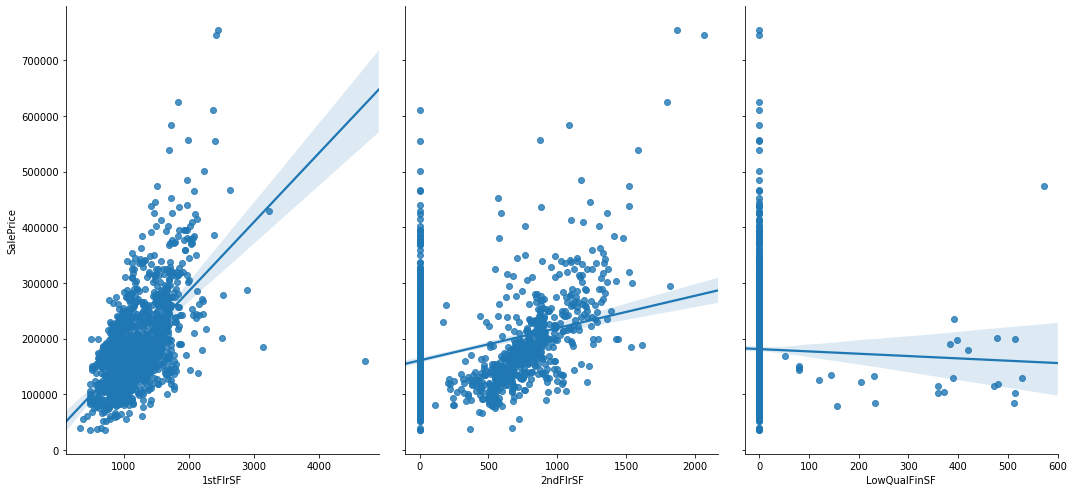

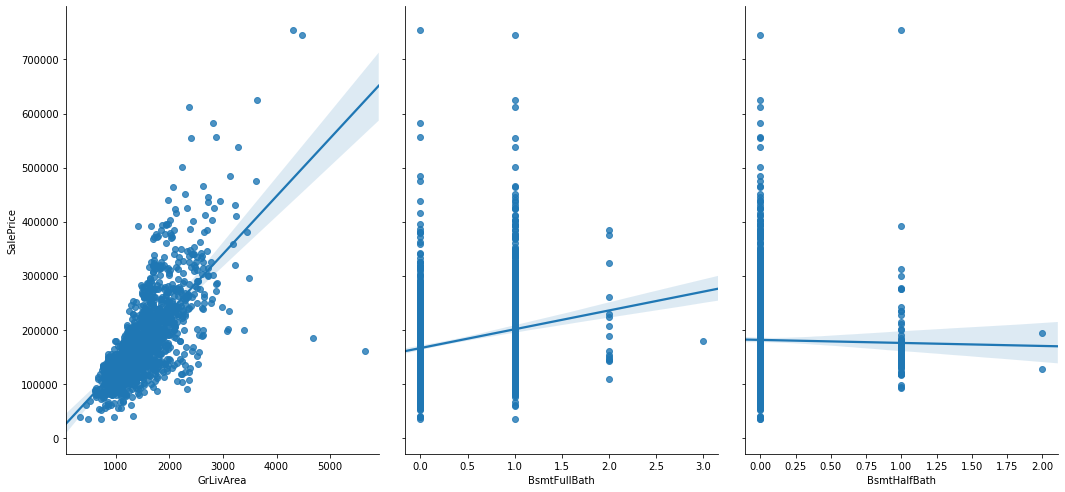

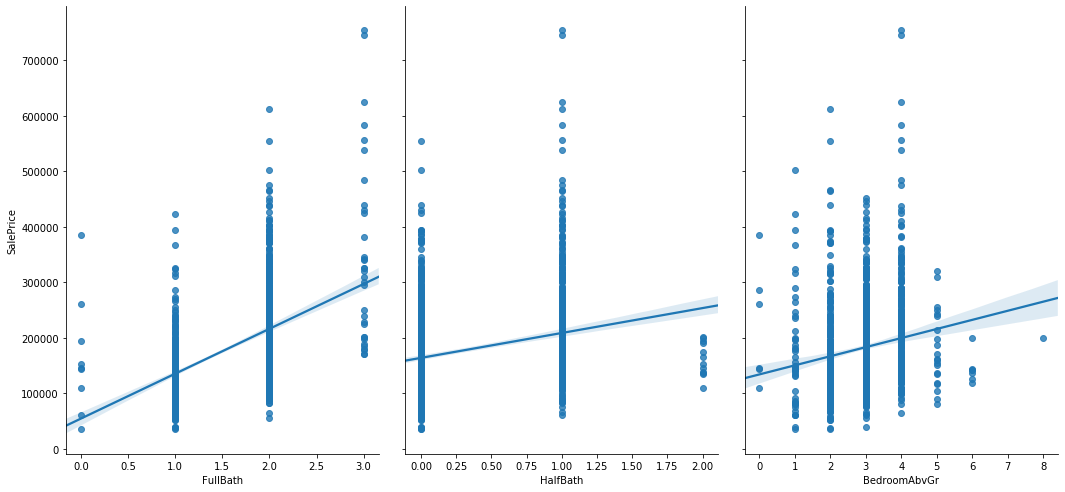

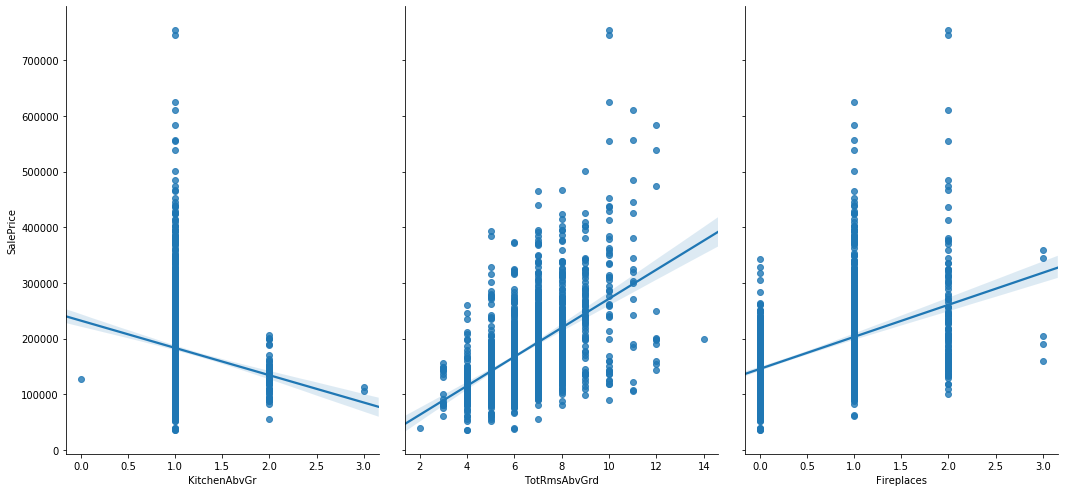

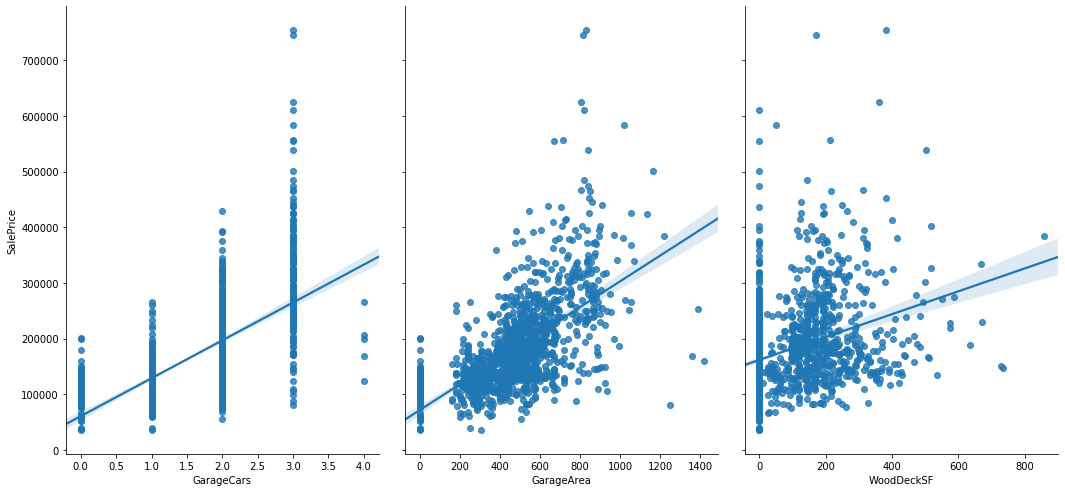

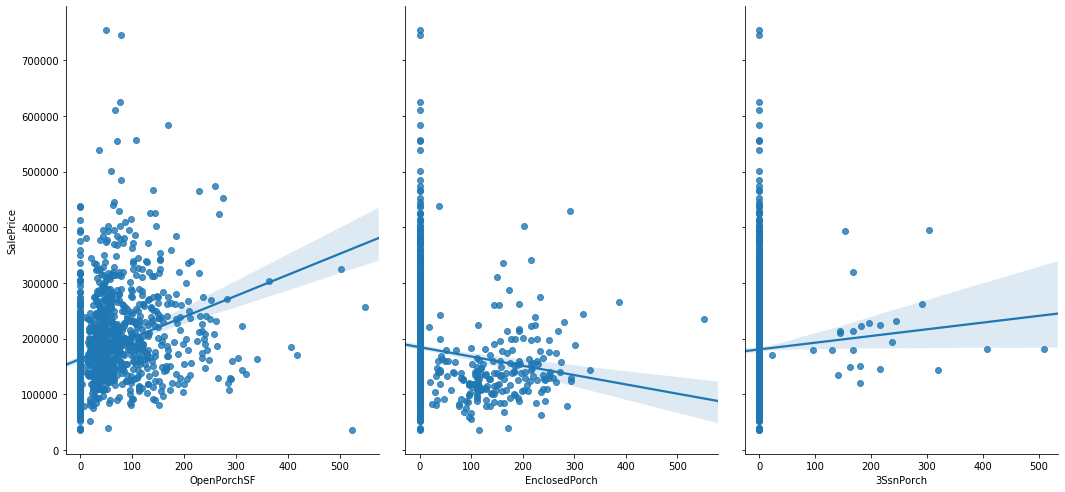

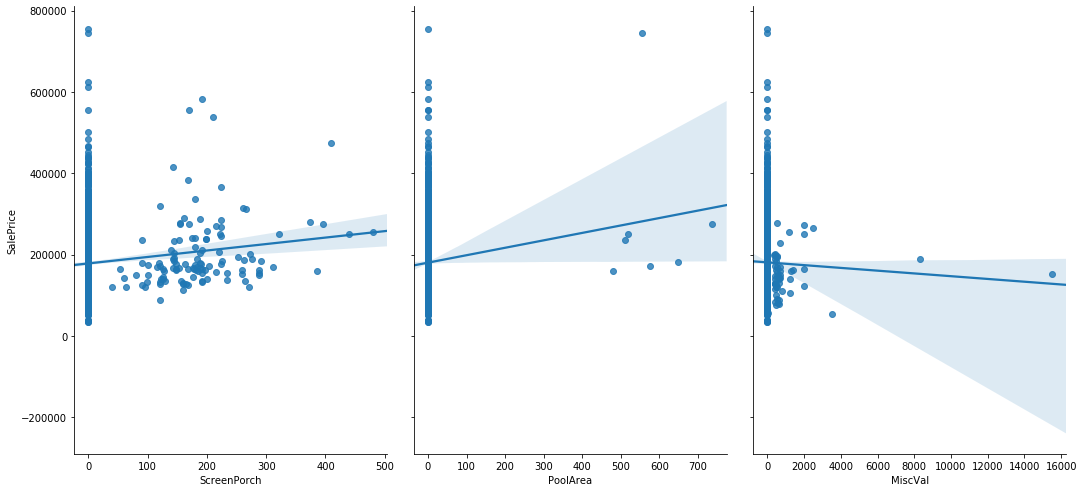

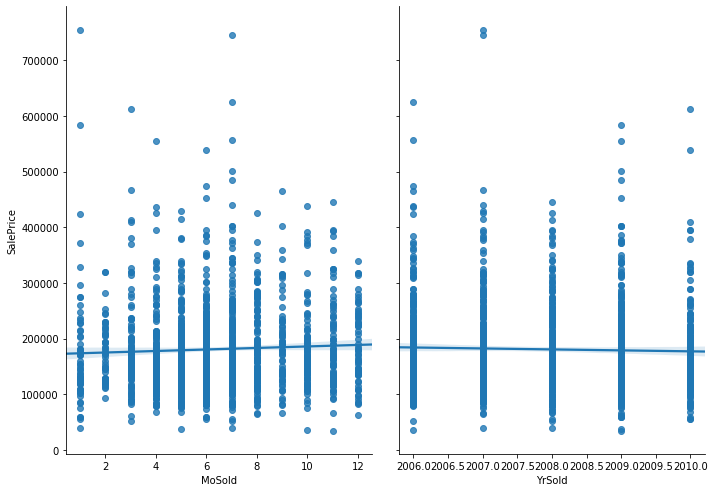

In [321]:
for i in range(0,len(new)-1,3):
        sns.pairplot(df, x_vars=new[i:i+3], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [277]:
new = X_int_columns[0:2] + X_int_columns[4:]

In [314]:
x_array = np.array(X[X_int_columns]).reshape((1, -1))

In [315]:
y_array = np.array(y).reshape((1, -1))